In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
     

## Load and explore the data

In [3]:
data = pd.read_csv("heart_disease.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
missing_values = data.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Using Interquartile Range (IQR) method
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR:\n", outliers_iqr)

# Using Z-score method
from scipy.stats import zscore
z_scores = np.abs(data[numerical_columns].apply(zscore))
outliers_z = (z_scores > 3).sum()
print("\nOutliers detected using Z-score:\n", outliers_z)



Outliers detected using IQR:
 age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64

Outliers detected using Z-score:
 age          0
sex          0
cp           0
trestbps     7
chol        13
fbs          0
restecg      0
thalach      4
exang        0
oldpeak      7
slope        0
ca          18
thal         7
target       0
dtype: int64


In [10]:
for col in data.select_dtypes(include=['number']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Replacing high outliers with Q3
    data.loc[data[col] > upper, col] = Q3
    # Replacing low outliers with Q1
    data.loc[data[col] < lower, col] = Q1


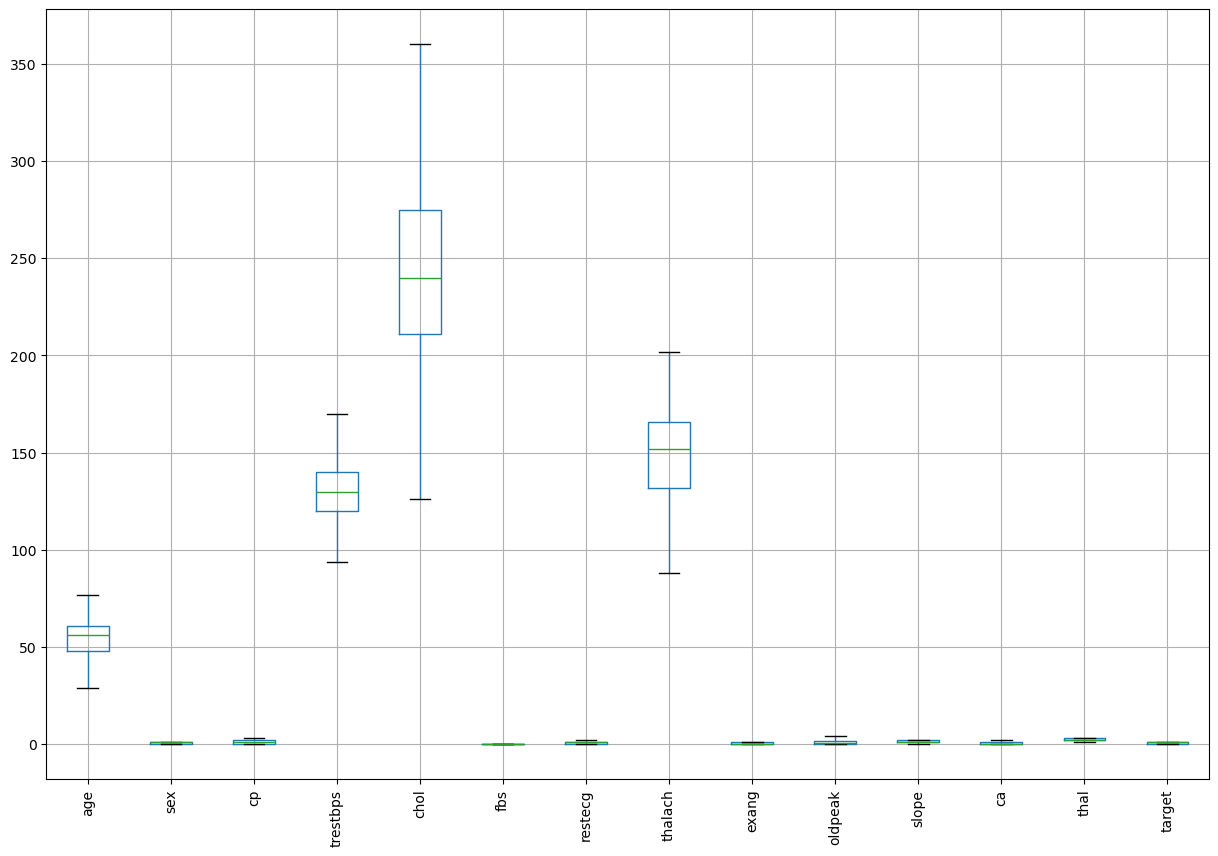

In [11]:
plt.figure(figsize=(15, 10))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

## Data cleaning and Preprocessing

In [13]:
data.shape


(1025, 14)

In [14]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:

data.fillna(data.mean(numeric_only=True), inplace=True)

for col in data.select_dtypes(include=['object', 'category']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("Missing values handled successfully!")


Missing values handled successfully!


In [16]:
from scipy.stats import zscore
numerical_columns = data.select_dtypes(include=[np.number]).columns

Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for col in numerical_columns:
    median_value = data[col].median()
    data[col] = np.where((data[col] < lower_bound[col]) | (data[col] > upper_bound[col]), median_value, data[col])

# Detect outliers using Z-score (values > 3 or < -3)
z_scores = np.abs(data[numerical_columns].apply(zscore))
outliers_z = z_scores > 3

# Replace Z-score outliers with mean
for col in numerical_columns:
    mean_value = data[col].mean()
    data[col] = np.where(outliers_z[col], mean_value, data[col])

print("Outliers handled successfully!")

Outliers handled successfully!


In [17]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,0.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,0.0,1.0,106.0,0.0,1.9,1.0,1.0,2.0,0.0


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']

# Apply StandardScaler (mean = 0, standard deviation = 1)
standard_scaler = StandardScaler()
data[features_to_scale] = standard_scaler.fit_transform(data[features_to_scale])

print("Standardized values:\n", data[features_to_scale].head())

# Apply MinMaxScaler (scales values between 0 and 1)
minmax_scaler = MinMaxScaler()
data[features_to_scale] = minmax_scaler.fit_transform(data[features_to_scale])

print("Normalized values:\n", data[features_to_scale].head())

Standardized values:
    trestbps      chol   thalach   oldpeak
0 -0.354455 -0.696805  0.828979 -0.028255
1  0.633355 -0.896000  0.251070  1.904032
2  0.962625 -1.537851 -1.082564  1.443964
3  1.160187 -0.896000  0.517797 -0.948392
4  0.501647  1.118083 -1.927200  0.799868
Normalized values:
    trestbps      chol   thalach   oldpeak
0  0.407895  0.367521  0.701754  0.238095
1  0.605263  0.329060  0.587719  0.738095
2  0.671053  0.205128  0.324561  0.619048
3  0.710526  0.329060  0.640351  0.000000
4  0.578947  0.717949  0.157895  0.452381


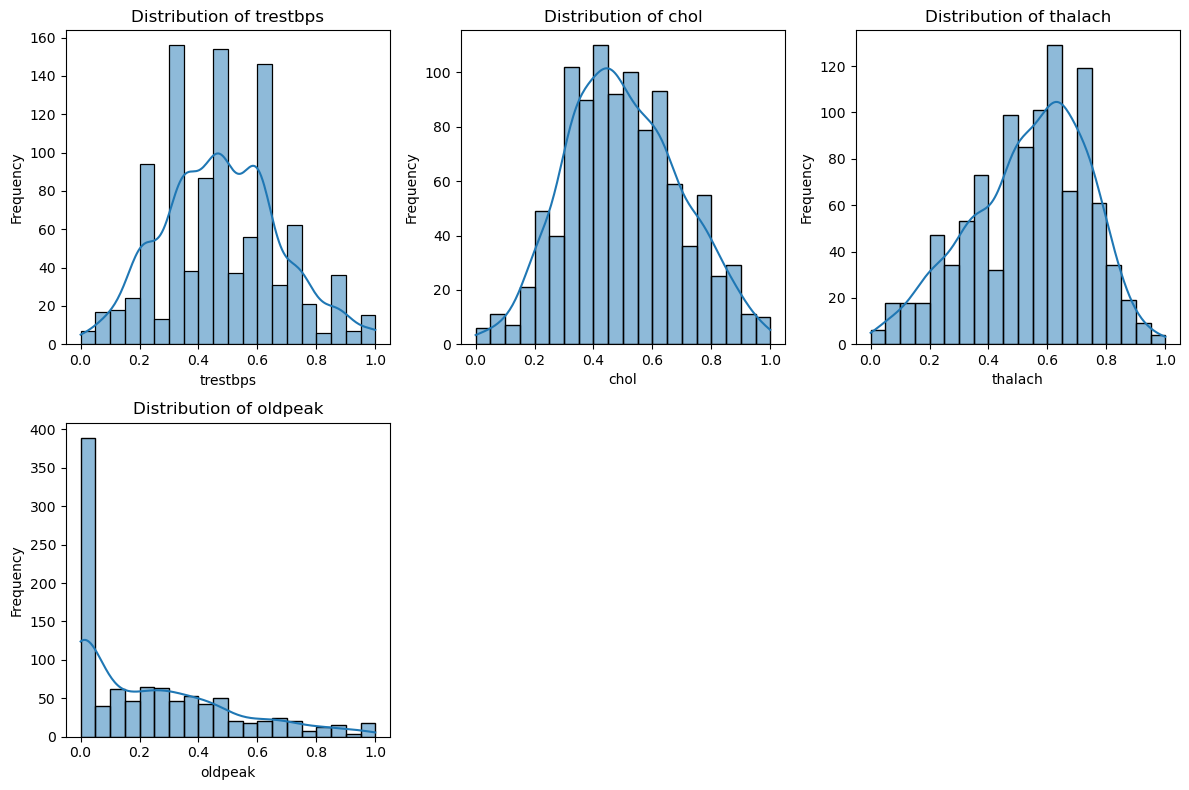

In [19]:

columns = ['trestbps', 'chol', 'thalach',  'oldpeak']

# Create histograms
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns):
    plt.subplot(len(columns)//3 + 1, 3, i+1)
    sns.histplot(data[col], bins=20, kde=True, edgecolor='black')  # kde=True adds the distribution line
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()



In [20]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,0.407895,0.367521,0.0,1.0,0.701754,0.0,0.238095,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,0.605263,0.329060,0.0,0.0,0.587719,1.0,0.738095,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,0.671053,0.205128,0.0,1.0,0.324561,1.0,0.619048,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,0.710526,0.329060,0.0,1.0,0.640351,0.0,0.000000,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,0.578947,0.717949,0.0,1.0,0.157895,0.0,0.452381,1.0,1.0,2.0,0.0


In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [68]:
features_to_scale_min_max = ['trestbps', 'thalach']

In [70]:
scaler = MinMaxScaler()
data[features_to_scale_min_max] = scaler.fit_transform(data[features_to_scale_min_max])

In [72]:
features_to_scale_std = ['oldpeak']
scaler = StandardScaler()
data[features_to_scale_std] = scaler.fit_transform(data[features_to_scale_std])


In [74]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,0.407895,0.367521,0.0,1.0,0.701754,0.0,-0.028255,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,0.605263,0.329060,0.0,0.0,0.587719,1.0,1.904032,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,0.671053,0.205128,0.0,1.0,0.324561,1.0,1.443964,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,0.710526,0.329060,0.0,1.0,0.640351,0.0,-0.948392,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,0.578947,0.717949,0.0,1.0,0.157895,0.0,0.799868,1.0,1.0,2.0,0.0


## Train-Test Split

In [77]:
data_reg = data
data_cls = data

In [79]:
data_reg.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,0.407895,0.367521,0.0,1.0,0.701754,0.0,-0.028255,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,0.605263,0.329060,0.0,0.0,0.587719,1.0,1.904032,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,0.671053,0.205128,0.0,1.0,0.324561,1.0,1.443964,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,0.710526,0.329060,0.0,1.0,0.640351,0.0,-0.948392,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,0.578947,0.717949,0.0,1.0,0.157895,0.0,0.799868,1.0,1.0,2.0,0.0


In [81]:
chol=["chol"]
scaler = MinMaxScaler()
data_cls[chol] = scaler.fit_transform(data_cls[chol])

In [83]:
data_cls.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,0.407895,0.367521,0.0,1.0,0.701754,0.0,-0.028255,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,0.605263,0.329060,0.0,0.0,0.587719,1.0,1.904032,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,0.671053,0.205128,0.0,1.0,0.324561,1.0,1.443964,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,0.710526,0.329060,0.0,1.0,0.640351,0.0,-0.948392,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,0.578947,0.717949,0.0,1.0,0.157895,0.0,0.799868,1.0,1.0,2.0,0.0


## Regression

In [88]:
X1=data_reg.drop(columns=["chol","target"])
y1=data_reg["chol"]

In [90]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.25, random_state=42)

## Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression

In [95]:
reg_lin = LinearRegression()
reg_lin.fit(X1_train, y1_train)
y1_pred = reg_lin.predict(X1_test)

In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [101]:
mse_lnreg = mean_squared_error(y1_test, y1_pred)
mae_lnreg = mean_absolute_error(y1_test, y1_pred)
r2_lnreg = r2_score(y1_test, y1_pred)
print("Linear Regression Mean Squared Error:", mse_lnreg)
print("Linear Regression Mean Absolute Error:", mae_lnreg)
print("Linear Regression R-squared:", r2_lnreg)

Linear Regression Mean Squared Error: 0.03715961043174949
Linear Regression Mean Absolute Error: 0.15416682998853737
Linear Regression R-squared: 0.010073216424961284


## Decision tree

In [106]:
from sklearn.tree import DecisionTreeRegressor
dt_clf = DecisionTreeRegressor()
dt_clf.fit(X1_train,y1_train)
y1_pred = dt_clf.predict(X1_test)

In [108]:
mse_dectree = mean_squared_error(y1_test, y1_pred)
mae_dectree = mean_absolute_error(y1_test, y1_pred)
r2_dectree = r2_score(y1_test, y1_pred)
print("Decision Tree Mean Squared Error:", mse_dectree)
print("Decision Tree Mean Absolute Error:", mae_dectree)
print("Decision Tree R-squared:", r2_dectree)

Decision Tree Mean Squared Error: 0.001346475755335378
Decision Tree Mean Absolute Error: 0.0072832485283847205
Decision Tree R-squared: 0.9641300756882513


## Random Forest Regression

In [111]:
from sklearn.ensemble import RandomForestRegressor
rf_clf = RandomForestRegressor()
rf_clf.fit(X1_train,y1_train)

RandomForestRegressor()

In [113]:
y1_pred = rf_clf.predict(X1_test)

In [115]:
mse_RandFor = mean_squared_error(y1_test, y1_pred)
mae_RandFor = mean_absolute_error(y1_test, y1_pred)
r2_RandFor = r2_score(y1_test, y1_pred)
print("Random Forest Regressor Mean Squared Error:", mse_RandFor)
print("Random Forest Regressor Mean Absolute Error:", mae_RandFor)
print("Random Forest Regressor R-squared:", r2_RandFor)

Random Forest Regressor Mean Squared Error: 0.0023554704095111235
Random Forest Regressor Mean Absolute Error: 0.033869433635970586
Random Forest Regressor R-squared: 0.9372506003372613


## Classification

In [118]:
X2=data_cls.drop(columns=["target"])
y2=data["target"]

In [120]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.25, random_state=42)

In [122]:
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [125]:
reg_log = LogisticRegression()
reg_log.fit(X2_train, y2_train)
y2_pred = reg_log.predict(X2_test)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [131]:
accuracy_Lgr = accuracy_score(y2_test, y2_pred)
precision_Lgr = precision_score(y2_test, y2_pred)
recall_Lgr = recall_score(y2_test, y2_pred)
f1_Lgr = f1_score(y2_test, y2_pred)
print(f"Logistic Regression Accuracy: {accuracy_Lgr}")
print(f"Logistic Regression Precision: {precision_Lgr}")
print(f"Logistic Regression Recall: {recall_Lgr}")
print(f"Logistic Regression F1 Score: {f1_Lgr}")

Logistic Regression Accuracy: 0.8249027237354085
Logistic Regression Precision: 0.773972602739726
Logistic Regression Recall: 0.904
Logistic Regression F1 Score: 0.8339483394833949


## K- Nearest Neighbours

In [134]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
y2_pred = knn.predict(X2_test)

In [138]:
accuracy_knn = accuracy_score(y2_test, y2_pred)
precision_knn = precision_score(y2_test, y2_pred)
recall_knn = recall_score(y2_test, y2_pred)
f1_knn = f1_score(y2_test, y2_pred)

print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1 Score: {f1_knn}")

KNN Accuracy: 0.8365758754863813
KNN Precision: 0.8672566371681416
KNN Recall: 0.784
KNN F1 Score: 0.8235294117647058


## Naive Bayes

In [141]:
from sklearn.naive_bayes import GaussianNB

In [143]:
nb = GaussianNB()
nb.fit(X2_train, y2_train)
y2_pred = nb.predict(X2_test)

In [145]:
accuracy_nb = accuracy_score(y2_test, y2_pred)
precision_nb = precision_score(y2_test, y2_pred)
recall_nb = recall_score(y2_test, y2_pred)
f1_nb = f1_score(y2_test, y2_pred)

print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(f"Naive Bayes Precision: {precision_nb}")
print(f"Naive Bayes Recall: {recall_nb}")
print(f"Naive Bayes F1 Score: {f1_nb}")

Naive Bayes Accuracy: 0.8171206225680934
Naive Bayes Precision: 0.7746478873239436
Naive Bayes Recall: 0.88
Naive Bayes F1 Score: 0.8239700374531835
